# Homework Assignment 2

CS 156

Caitlyn Chau
## Part A: Data Import & Data Preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### A. Read csv file

In [2]:
dataset = pd.read_csv('Housing-Data-one-zip-3.csv')
x = dataset.iloc[:, :-1]
y = dataset.iloc[:,15:16]

#### B. Convert categorical data

In [3]:
# col 0 - waterfront (y/n) 
# col 1 - renovated (y/n) 
# col 2 - view (index from 0-4) 
# col 3 - condition (index from 1-5) 
# col 4 - condition (index from 1-5)

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=
                       [('encoder', OneHotEncoder(), [0,1,2,3,4])
                       ], remainder='passthrough')

x = np.array(ct.fit_transform(x))

#### C. Transform some data.

In [4]:
# Age of house = 2020 - Year built
x[:, -3] = 2020 - x[:, -3]
print(x[:, -3])

[ 59.  42.  52.  66.  65.  59.  41.  51.  64.  49.  43.  58. 111.  52.
  65. 107.  53.  45.  77.  53.  53.  53.  68.  68.  42.  59.  32.  53.
  48. 112.  74. 107.  51.  62.  48.  60.  55.  53. 108.  62.  58.  58.
  54.  50.  67.  51.  60.  56.  46.  45.  61.  44.  73.  57. 107.  48.
  58.  57.  72.  66.  78.  84.  77.  31.  53.  53.  34.  47.  47.  27.
  45.  52.  50.  53.  45.  54.  47.  51.  56.  49.  40.  58.  39.  66.
  53.  70.  66.  32.  51.  57.  56. 117.  74.  52.  37.  48.  58.  50.
  53.  37.  40.  51.  42.  33.  30.  81.  54.  39.  30.  58.  31.  39.
  56.  67.  35.  44.  41.  76.  53.  31.  55.  35.  74.  32.  51.  84.
  57.  57.  36.  58.  40.  70.  54.  37.  42.  82.  52. 112.  58.  60.
  52.  55.  42.  67.  67.  58.  58.  36.  25.  60.  31.  74.  36.  46.
  35.  35.  26.  57.  53.  17.  53.  46.  28.  52.  58.  17.  35.  53.
  61.  26.  73.  34.  22.  10.  32. 101.   6.  41.  61.  52.  43.  22.
  59.  42.  55.  32.  21.  21.  41.  42.  29.  21.  58.  56.  23.  55.
  44. 

#### D. Divide the data set into Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split

# Only train on last 10 features (exclude categorical variables)
limitedFeatures = x[:, -10:]

# Train and test set containing only sqft_living (x) and price variables (y)
x_train_simple, x_test_simple, y_train_simple, y_test_simple = train_test_split(x[:,-8:-7], y, test_size = 1/3, random_state = 0)

# Train and test set containing all variables
x_train_multiple, x_test_multiple, y_train_multiple, y_test_multiple = train_test_split(limitedFeatures, y, test_size = 1/20, random_state = 0)

#### Feature scale all variables so they are on a comparable scale

Note: dummy variables have already been excluded

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

print("Before scaling: ", x_train_multiple[0, :])

x_train_multiple = sc.fit_transform(x_train_multiple)
x_test_multiple = sc.transform(x_test_multiple)

print("After scaling: ", x_train_multiple[0, :])

Before scaling:  [1.000e+00 2.000e+00 1.150e+03 9.812e+03 1.000e+00 1.150e+03 0.000e+00
 5.800e+01 1.200e+03 9.812e+03]
After scaling:  [-3.34744278 -0.02629631 -1.14896514 -0.23935236 -0.87091649 -0.90168936
 -0.49514548  0.81869566 -1.28097693 -0.17813406]


## Part B: Simple Linear Regression

Predict house price using Sqft_living as independent variable.

In [7]:
from sklearn.linear_model import LinearRegression
simple_regressor = LinearRegression()
simple_regressor.fit(x_train_simple, y_train_simple)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

y_pred_simple = simple_regressor.predict(x_test_simple)

#### A. Print r-square value

In [8]:
print(simple_regressor.score(x_train_simple, y_train_simple))

0.659298081189599


#### Plot simple linear regression for Training Dataset

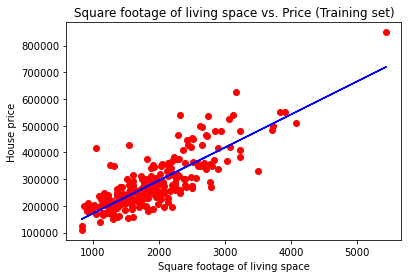

In [9]:
plt.scatter(x_train_simple, y_train_simple, color='red')
plt.plot(x_train_simple, simple_regressor.predict(x_train_simple), color='blue')
plt.title('Square footage of living space vs. Price (Training set)')
plt.xlabel('Square footage of living space')
plt.ylabel('House price')
plt.show()

#### Plot simple linear regression line for Test Dataset

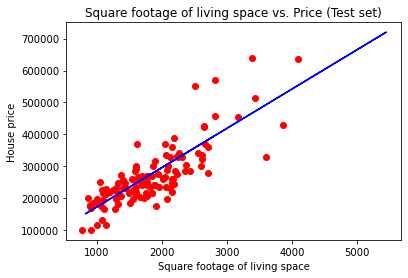

In [10]:
plt.scatter(x_test_simple, y_test_simple, color='red')
plt.plot(x_train_simple, simple_regressor.predict(x_train_simple), color='blue')
plt.title('Square footage of living space vs. Price (Test set)')
plt.xlabel('Square footage of living space')
plt.ylabel('House price')
plt.show()

#### D. Predict house price for:
* sqft_living = 4500
* sqft_living = 2870
* sqft_living = 750

In [11]:
print(simple_regressor.predict([[4500]]))
print(simple_regressor.predict([[2870]]))
print(simple_regressor.predict([[750]]))

[[604041.28593442]]
[[402782.36474183]]
[[141022.29546066]]


## Part C: Multiple Linear Regression
Use all variables to predict the house price.

In [12]:
multiple_regressor = LinearRegression()
multiple_regressor.fit(x_train_multiple, y_train_multiple)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression()

In [13]:
y_pred_multiple = multiple_regressor.predict(x_test_multiple)

print("Coefficients: ", multiple_regressor.coef_)
print("Intercept: ", multiple_regressor.intercept_)

Coefficients:  [[ -2008.19178391   2224.15104329  32702.33335995  15532.02773631
     843.94621487  25852.51876039  13768.2092072  -13000.12418346
   14550.28315343  18245.54397169]]
Intercept:  [281041.01754386]


#### A. Print r-square value

In [14]:
print(multiple_regressor.score(x_train_multiple, y_train_multiple))

0.7593185216904335


#### B. Predict house prices for following cases where

In [15]:
# [Bedrooms, Bathrooms, Sqft_living, Sqft_lot, Floors, Sqft_above, Sqft_basement, Age, Sqft_living15, Sqft_lot15]

# [3, 0.75, 2510, 20000, 2.0, 2510, 0, 59, 2130, 20000]
print(multiple_regressor.predict([[3, 0.75, 2510, 20000, 2.0, 2510, 0, 59, 2130, 20000]]))

# [4, 2.25, 1500,   5393, 2.0, 1500, 0, 21, 1500,    5952]
print(multiple_regressor.predict([[4, 2.25, 1500,   5393, 2.0, 1500, 0, 21, 1500,    5952]]))

# [4, 2.25, 2870,   5393, 2.0, 2870, 0, 21, 1500, 5952]
print(multiple_regressor.predict([[4, 2.25, 2870,   5393, 2.0, 2870, 0, 21, 1500, 5952]]))

# [4, 3.50, 4083, 68377, 2.0, 4083, 0, 15, 2430, 41382]
print(multiple_regressor.predict([[4, 3.50, 4083, 68377, 2.0, 4083, 0, 15, 2430, 41382]]))

# [4, 3.50, 4500, 68377, 2.0, 4500, 0, 15, 2430, 41382]
print(multiple_regressor.predict([[4, 3.50, 4500, 68377, 2.0, 4500, 0, 15, 2430, 41382]]))

# [4, 3.50, 2870, 68377, 2.0, 2870, 0, 15, 2430, 41382]
print(multiple_regressor.predict([[4, 3.50, 2870, 68377, 2.0, 2870, 0, 15, 2430, 41382]]))

# [4, 3.50,   750, 68377, 2.0,   750, 0, 15, 2430, 41382]
print(multiple_regressor.predict([[4, 3.50,   750, 68377, 2.0,   750, 0, 15, 2430, 41382]]))

[[8.53027581e+08]]
[[3.02026104e+08]]
[[3.82246251e+08]]
[[2.09159469e+09]]
[[2.11601206e+09]]
[[2.02056765e+09]]
[[1.89643137e+09]]


## Part D: Decision Tree Regression

In [16]:
from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(random_state = 0)
tree_regressor.fit(limitedFeatures, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                     max_features=None, max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, presort='deprecated',
                     random_state=0, splitter='best')

DecisionTreeRegressor(random_state=0)

#### A. Print r-square value

In [17]:
print(tree_regressor.score(limitedFeatures, y))

0.9950486495433811


#### B. Predict house prices

In [18]:
# [Bedrooms, Bathrooms, Sqft_living, Sqft_lot, Floors, Sqft_above, Sqft_basement, Age, Sqft_living15, Sqft_lot15]

# [3, 0.75, 2510, 20000, 2.0, 2510, 0, 59, 2130, 20000]
print(tree_regressor.predict([[3, 0.75, 2510, 20000, 2.0, 2510, 0, 59, 2130, 20000]]))

# [4, 2.25, 1500,   5393, 2.0, 1500, 0, 21, 1500,    5952]
print(tree_regressor.predict([[4, 2.25, 1500,   5393, 2.0, 1500, 0, 21, 1500,    5952]]))

# [4, 2.25, 2870,   5393, 2.0, 2870, 0, 21, 1500, 5952]
print(tree_regressor.predict([[4, 2.25, 2870,   5393, 2.0, 2870, 0, 21, 1500, 5952]]))

# [4, 3.50, 4083, 68377, 2.0, 4083, 0, 15, 2430, 41382]
print(tree_regressor.predict([[4, 3.50, 4083, 68377, 2.0, 4083, 0, 15, 2430, 41382]]))

# [4, 3.50, 4500, 68377, 2.0, 4500, 0, 15, 2430, 41382]
print(tree_regressor.predict([[4, 3.50, 4500, 68377, 2.0, 4500, 0, 15, 2430, 41382]]))

# [4, 3.50, 2870, 68377, 2.0, 2870, 0, 15, 2430, 41382]
print(tree_regressor.predict([[4, 3.50, 2870, 68377, 2.0, 2870, 0, 15, 2430, 41382]]))

# [4, 3.50,   750, 68377, 2.0,   750, 0, 15, 2430, 41382]
print(tree_regressor.predict([[4, 3.50,   750, 68377, 2.0,   750, 0, 15, 2430, 41382]]))


[363000.]
[215000.]
[250000.]
[637000.]
[637000.]
[535000.]
[194820.]


## Part E: Random Forest Regression
Use 10 random trees to predict house price

In [19]:
from sklearn.ensemble import RandomForestRegressor
forest_regressor = RandomForestRegressor(n_estimators=10, random_state=0)
forest_regressor.fit(limitedFeatures, y.values.ravel())
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0,
                     min_impurity_split=None, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=10, n_jobs=None, oob_score=False, 
                     random_state=0, verbose=0, warm_start=False)

RandomForestRegressor(n_estimators=10, random_state=0)

#### A. Print r-square value

In [20]:
print(forest_regressor.score(limitedFeatures, y))

0.944281528191851


#### B. Predict house prices

In [21]:
# [Bedrooms, Bathrooms, Sqft_living, Sqft_lot, Floors, Sqft_above, Sqft_basement, Age, Sqft_living15, Sqft_lot15]

# [3, 0.75, 2510, 20000, 2.0, 2510, 0, 59, 2130, 20000]
print(forest_regressor.predict([[3, 0.75, 2510, 20000, 2.0, 2510, 0, 59, 2130, 20000]]))

# [4, 2.25, 1500,   5393, 2.0, 1500, 0, 21, 1500,    5952]
print(forest_regressor.predict([[4, 2.25, 1500,   5393, 2.0, 1500, 0, 21, 1500,    5952]]))

# [4, 2.25, 2870,   5393, 2.0, 2870, 0, 21, 1500, 5952]
print(forest_regressor.predict([[4, 2.25, 2870,   5393, 2.0, 2870, 0, 21, 1500, 5952]]))

# [4, 3.50, 4083, 68377, 2.0, 4083, 0, 15, 2430, 41382]
print(forest_regressor.predict([[4, 3.50, 4083, 68377, 2.0, 4083, 0, 15, 2430, 41382]]))

# [4, 3.50, 4500, 68377, 2.0, 4500, 0, 15, 2430, 41382]
print(forest_regressor.predict([[4, 3.50, 4500, 68377, 2.0, 4500, 0, 15, 2430, 41382]]))

# [4, 3.50, 2870, 68377, 2.0, 2870, 0, 15, 2430, 41382]
print(forest_regressor.predict([[4, 3.50, 2870, 68377, 2.0, 2870, 0, 15, 2430, 41382]]))

# [4, 3.50,   750, 68377, 2.0,   750, 0, 15, 2430, 41382]
print(forest_regressor.predict([[4, 3.50,   750, 68377, 2.0,   750, 0, 15, 2430, 41382]]))


[388750.]
[214800.]
[308600.]
[588090.]
[588090.]
[523190.]
[255754.]


## Summary of Observations

#### A. Which predictive model performed the best?
Based off the r-squared values, the decision tree regression model performed the best. R-square is a measurement of how close the data is to the fitted regression line. The closer r-squared is to 1, the better the prediction. The order of highest to lowest r-squared values is as follows:
1. Decision tree regression = 0.9950486495433811
2. Random forest regression = 0.944281528191851
3. Multiple linear regression = 0.7593185216904335
4. Simple linear regression = 0.659298081189599

#### B. Which variables are most important for prediction?
We can find out which variables are the most important by standardizing the regression coefficients so they are all on the same scale. Standardizing features removes the mean and scales to unit variance. In multiple linear regression, we see that the coefficients are:
```
Coefficients:  [[ -2008.19178391   2224.15104329  32702.33335995  15532.02773631 843.94621487  25852.51876039  13768.2092072  -13000.12418346  14550.28315343  18245.54397169]]
```
which correspond to `[Bedrooms, Bathrooms, Sqft_living, Sqft_lot, Floors, Sqft_above, Sqft_basement, Age, Sqft_living15, Sqft_lot15]`. The coefficients with the highest absolute values represent the most significant variables for the prediction. We see that **Sqft_living**, **Sqft_above**, and **Sqft_lot15** are the most important variables for prediction.